## **Proyecto 2 - Productos bancarios**
**Analítica Computacional para la toma de Decisiones**

Grupo: 
1.	Nicolay Esteban Barrera Bayona – 201731399
2.	Daniel Sebastian Caro Ochoa – 202117080


**Roles**
- Nicolay Barrera: Ciencia de datos, Tablero de datos y Despliegue 
- Daniel Caro: Ingeniería de datos, Análisis de datos y Análisis de negocio 

### **1. Exploración de datos**


***


In [99]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Cargar el archivo CSV
data = pd.read_csv('bank-full.csv', sep=';')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información general sobre el dataset (tipos de datos y valores nulos)
print("\nInformación general del dataset:")
data.info()

# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(data.describe())

# Verificar valores nulos en cada columna
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())

# Identificar columnas numéricas y de texto
caracteristicas_numericas = data.select_dtypes(include=[np.number]).columns.to_list()
caracteristicas_texto = data.select_dtypes(include=[object]).columns.to_list()

print("\nCaracterísticas numéricas:\n", caracteristicas_numericas)
print("\nCaracterísticas de texto:\n", caracteristicas_texto)

# Mostrar un análisis de los valores únicos en las columnas de texto
print("\nValores únicos en columnas de texto:")
for col in caracteristicas_texto:
    print(f"{col}: {data[col].nunique()} valores únicos")

# Mostrar los datos faltantes en porcentajes
print("\nPorcentaje de datos faltantes por columna:")
print((data.isnull().sum() / len(data)) * 100)


Primeras filas del dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

### **2. Descripción y Limpieza de Datos**

#### **2.1 Descripción General**
- Número de registros: 45,211.
- Columnas numéricas: Contiene 7 columnas numéricas principales: age, balance, day, duration, campaign, pdays, previous. Estas columnas representan características como la edad, balance en la cuenta, duración de la campaña y contactos previos.
- Columnas categóricas: Existen 10 columnas categóricas: job, marital, education, default, housing, loan, contact, month, poutcome, y y. Estas describen características del cliente, sus preferencias financieras y el resultado de la campaña.
- Valores nulos: No hay valores nulos en ninguna de las columnas.
- Duplicados: No se encontraron registros duplicados en el dataset.


In [100]:
# Verificar duplicados
duplicados = data.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

# Identificar valores atípicos usando IQR (Interquartile Range) para las columnas numéricas
Q1 = data[caracteristicas_numericas].quantile(0.25)
Q3 = data[caracteristicas_numericas].quantile(0.75)
IQR = Q3 - Q1
valores_atipicos = ((data[caracteristicas_numericas] < (Q1 - 1.5 * IQR)) | (data[caracteristicas_numericas] > (Q3 + 1.5 * IQR))).sum()

print("\nValores atípicos por columna:")
print(valores_atipicos)

# Verificar tipos de datos
print("\nTipos de datos incorrectos:")
for columna in data.columns:
    if data[columna].dtype == 'object':
        try:
            data[columna].astype(float)
        except:
            print(f"La columna '{columna}' tiene valores no numéricos.")

#Análisis de variables categóricas
cat_feats = data.select_dtypes(include=['object']).columns

# Revisar las categorías únicas y frecuencia de cada variable categórica
for col in cat_feats:
    print(f"\nCategorías únicas en '{col}': {data[col].unique()}")
    print(data[col].value_counts())

profile = ProfileReport(data, title = "Reporte de Datos")
profile.to_notebook_iframe()

Duplicados encontrados: 0

Valores atípicos por columna:
age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64

Tipos de datos incorrectos:
La columna 'job' tiene valores no numéricos.
La columna 'marital' tiene valores no numéricos.
La columna 'education' tiene valores no numéricos.
La columna 'default' tiene valores no numéricos.
La columna 'housing' tiene valores no numéricos.
La columna 'loan' tiene valores no numéricos.
La columna 'contact' tiene valores no numéricos.
La columna 'month' tiene valores no numéricos.
La columna 'poutcome' tiene valores no numéricos.
La columna 'y' tiene valores no numéricos.

Categorías únicas en 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired    

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### **2.2 Transformación sobre los datos** 

In [ ]:
# Escalado de variables numéricas
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Reemplazar 'yes' y 'no' en la variable de salida 'y' por 1 y 0 respectivamente
data['y'] = data['y'].replace({'yes': 1, 'no': 0})

# Definimos listas para las variables categóricas enteras, categóricas string y numéricas.
cat_int_feats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_feats = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Ordenamos columnas
feats_ordered = num_feats + cat_int_feats

# Reordenamos de acuerdo al tipo de variable objetivo
data = data[feats_ordered + ['y']]

# Convertir todas las variables numéricas a float
for feature in num_feats:
    data[feature] = data[feature].astype(float)

# Verificación de consistencia en datos categóricos
# Eliminar posibles espacios en blanco y homogeneizar las categorías en minúsculas
for col in cat_int_feats:
    data[col] = data[col].str.strip().str.lower()

# Revisión de las categorías después del ajuste de consistencia
for col in cat_feats:
    print(f"\nCategorías en '{col}' tras ajuste:\n", data[col].unique())

# Aplicar pd.get_dummies a las columnas categóricas
#data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Verificar los resultados finales
print("Transformaciones completadas. Vista previa del dataset:")
print(data.head())

C:\Users\danis\AppData\Local\Temp\ipykernel_39080\2090986287.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['y'] = data['y'].replace({'yes': 1, 'no': 0})



Categorías en 'job' tras ajuste:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Categorías en 'marital' tras ajuste:
 ['married' 'single' 'divorced']

Categorías en 'education' tras ajuste:
 ['tertiary' 'secondary' 'unknown' 'primary']

Categorías en 'default' tras ajuste:
 ['no' 'yes']

Categorías en 'housing' tras ajuste:
 ['yes' 'no']

Categorías en 'loan' tras ajuste:
 ['no' 'yes']

Categorías en 'contact' tras ajuste:
 ['unknown' 'cellular' 'telephone']

Categorías en 'month' tras ajuste:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Categorías en 'poutcome' tras ajuste:
 ['unknown' 'failure' 'other' 'success']

Categorías en 'y' tras ajuste:
 [0 1]
Transformaciones completadas. Vista previa del dataset:
    age  balance  day  duration  campaign  pdays  previous           job  \
0  58.0   2143.0  5.0     261.0       1.0   -1.0       0.0    managem

### **3. Exploración de datos**

#### **Análisis de distribución de variables numéricas**

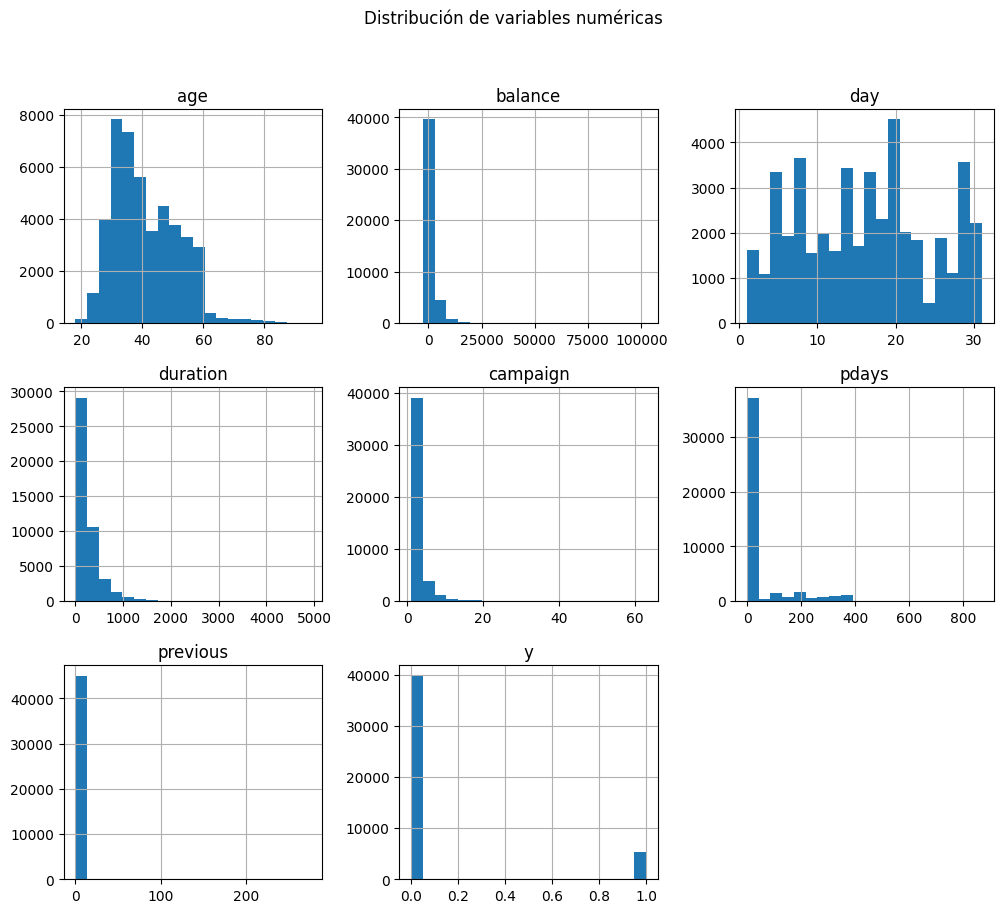

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
num_feats = data.select_dtypes(include=['int64', 'float64']).columns
data[num_feats].hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribución de variables numéricas")
plt.show()

#### **Boxplots para detectar valores atípicos**

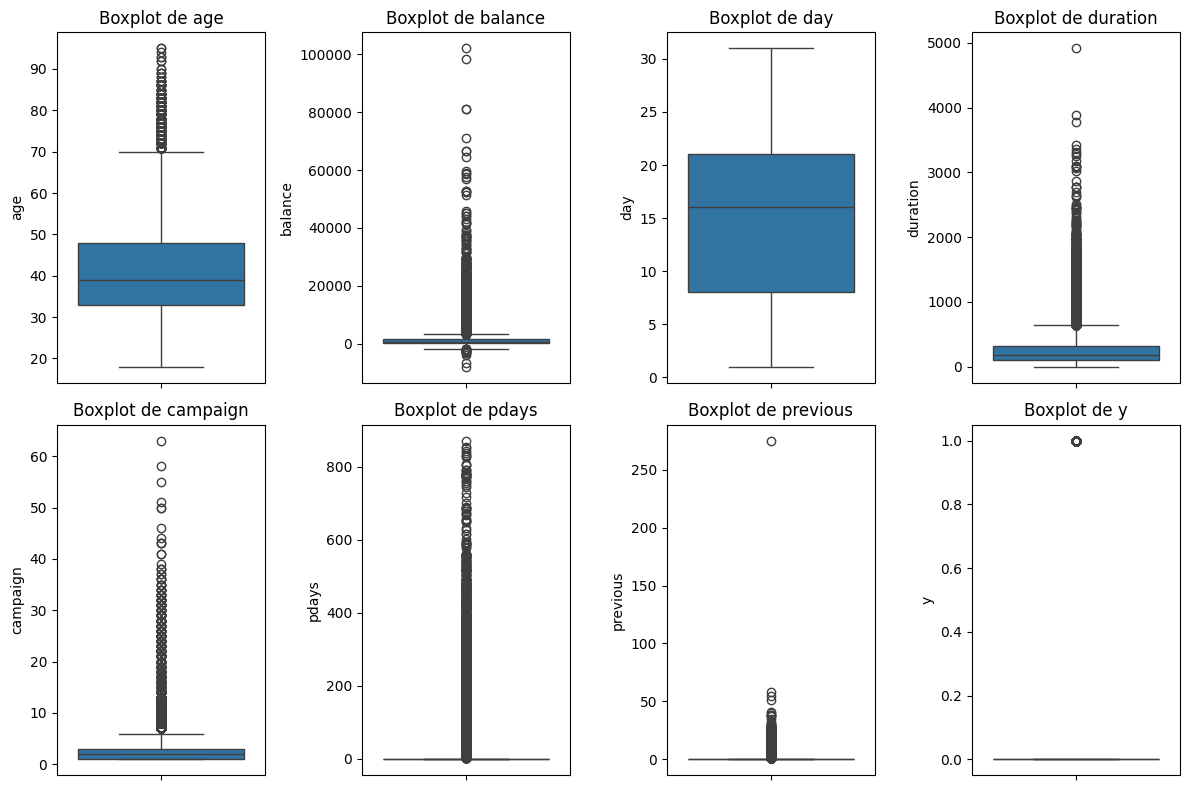

In [103]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_feats, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=data, y=col)
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

#### **Balance de la variable objetivo**

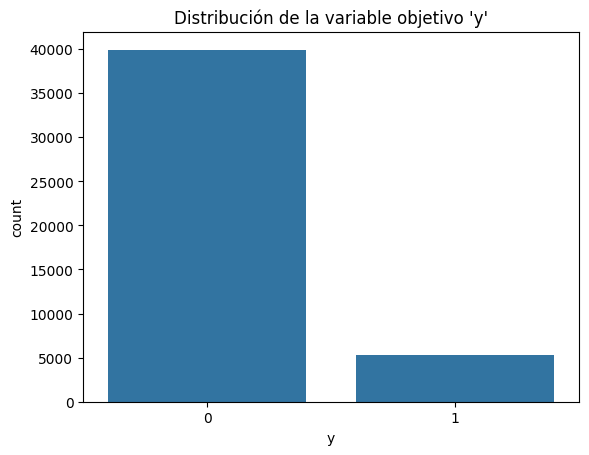

In [104]:
sns.countplot(data=data, x='y')
plt.title("Distribución de la variable objetivo 'y'")
plt.show()

### **4. Modelamiento**

#### **Definir los datos de entrenamiento y prueba**

In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Separamos datos de entrenamiento y de prueba
train = data.sample(frac=0.8, random_state=100)
test = data.drop(train.index)
val = train.sample(frac=0.2, random_state=100)
train = train.drop(val.index)


#### **Función para convertir de DataFrame (pandas) a Dataset (tensorflow), separando características y etiquetas**

In [106]:
# Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("y")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

# Separamos los datos de entrenamiento, validación y prueba en lotes
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

#### **Funciones para codificar variables**

In [107]:
# Función para codificar variables numéricas
def encode_numerical_feature(feature, name, dataset):
    normalizer = keras.layers.Normalization()
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))
    normalizer.adapt(feature_ds)
    encoded_feature = normalizer(feature)
    return encoded_feature

# Función para codificar variables categóricas
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    lookup = lookup_class(output_mode="binary")
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))
    lookup.adapt(feature_ds)
    encoded_feature = lookup(feature)
    return encoded_feature


#### **Codificación de caracteristicas**

In [110]:
# Lista de variables numéricas
num_feats = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Creamos una lista de inputs para el modelo
inputs = []
for i in num_feats:
    inputs.append(keras.Input(shape=(1,), name=i))

for i in cat_int_feats:
    inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))  # Asumimos que son strings

# Creamos una lista de variables codificadas/normalizadas
feats_encoded = []
for i, feat in enumerate(num_feats):
    feats_encoded.append(
        encode_numerical_feature(inputs[i], feat, train_ds)
    )

for i, feat in enumerate(cat_int_feats):
    feats_encoded.append(
        encode_categorical_feature(inputs[len(num_feats) + i], feat, train_ds, True)
    )

# Creamos una capa concatenando todas las variables codificadas
all_feats = keras.layers.concatenate(feats_encoded)



In [109]:
print(num_feats)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')


#### **Definir la Arquitectura del Modelo de Red Neuronal:**

In [111]:
# Agregamos una capa densa con 32 neuronas y función de activación relu
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

# Creamos el modelo con las capas ya creadas y las variables de entrada
model = keras.Model(inputs, model_layers)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Se concatenan las características codificadas en una sola capa de entrada. Luego, el modelo tiene una capa oculta de 32 neuronas con activación relu y una capa de salida con activación sigmoid para clasificación binaria.

#### **Entrenamiento y evaluación del modelo:**

In [112]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

# Entrenamos el modelo
model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50


UnimplementedError: Graph execution error:

Detected at node functional_5_1/Cast_3 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 604, in run_forever

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\danis\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\danis\AppData\Local\Temp\ipykernel_39080\1989731957.py", line 5, in <module>

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py", line 167, in call

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py", line 258, in _standardize_inputs

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py", line 218, in _convert_inputs_to_tensors

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\core.py", line 822, in convert_to_tensor

  File "c:\Users\danis\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node functional_5_1/Cast_3}}]] [Op:__inference_one_step_on_iterator_2252884]

#### **Visualización del Proceso de Entrenamiento:**

In [ ]:
# Extraer los valores de pérdida del historial
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Pérdida de entrenamiento')
plt.plot(val_loss, label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

#### **Verificar predicción del modelo:**

In [ ]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Productividad real')
plt.plot(y_pred, label='Productividad predicha')
plt.title('Productividad real vs predicha')
plt.xlabel('Índice de muestra')
plt.ylabel('Productividad')
plt.legend()
plt.grid(True)
plt.show()

### **5. Análisis de negocio**
**¿Pregunta?**